<a href="https://colab.research.google.com/github/Code-blooded-01/mask-rcnn/blob/main/Copy_of_mask_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MaskRCNN for Instance Segmentation
 ***Muhammad Ahmed Naseer***



## Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 24270, done.
remote: Total 24270 (delta 0), reused 0 (delta 0), pack-reused 24270
Receiving objects: 100% (24270/24270), 37.43 MiB | 25.97 MiB/s, done.
Resolving deltas: 100% (16940/16940), done.
/content/mmdetection/mmdetection
Obtaining file:///content/mmdetection/mmdetection
  Attempting uninstall: mmdet
    Found existing installation: mmdet 2.23.0
    Can't uninstall 'mmdet'. No files were found to uninstall.
  Running setup.py develop for mmdet


In [ ]:
# install library for downloading youtube videos
!pip install pytube

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.23.0
11.1
GCC 7.3


## Perform Inference with An MMDetection Detector

### A two-stage detector

In this project, we use Mask R-CNN, a simple two-stage detector as an example.

The high-level architecture of Mask R-CNN is shown in the following picture. More details can be found in the [paper](https://arxiv.org/abs/1703.06870).

<img src="https://user-images.githubusercontent.com/40661020/143967081-c2552bed-9af2-46c4-ae44-5b3b74e5679f.png" alt="mask rcnn" align="bottom" />


Download MaskRCNN weights pre-trained on COCO dataset

In [ ]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_x101_64x4d_fpn_1x_coco/mask_rcnn_x101_64x4d_fpn_1x_coco_20200201-9352eb0d.pth \
      -O checkpoints/mask_rcnn_x101_64x4d_fpn_1x_coco_20200201-9352eb0d.pth

Following things are happening in this code cell:

1. Create Config file, which specifies model architecture, dataset, and other training, testing settings.
2. Create Model object.
3. Load pre-trained weights in model object.
4. Set properties of model object, and set model for evaluation mode.

In [ ]:
# import dependencies for mmdetection
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_x101_64x4d_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_x101_64x4d_fpn_1x_coco_20200201-9352eb0d.pth'

# Set the device to be used for evaluation
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/mask_rcnn_x101_64x4d_fpn_1x_coco_20200201-9352eb0d.pth


MaskRCNN(
  (backbone): ResNeXt(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequ

In [ ]:
# print the configuration file
print(config.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNeXt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://resnext101_64x4d'),
        groups=64,
        base_width=4),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
        

From the printed model, we will find that the model does consist of the components that we described earlier. It uses ResNet as its CNN backbone, and has a RPN head and RoI Head. 
The RoI Head includes box head and mask head. In addition, the model has a neural network module, named neck, directly after the CNN backbone. It is a [feature pyramid network (FPN)](https://arxiv.org/abs/1612.03144) for enhancing the multi-scale features.

### Inference with the detector

The model is successfully created and loaded, let's see how good it is. We use the high-level API `inference_detector` implemented in the MMDetection. This API is created to ease the inference process. The details of the codes can be found [here](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/inference.py#L15).


In [ ]:
# import library to download images from url
import requests

# specify URL of image to download
image_url = 'https://image.shutterstock.com/image-vector/zoo-animals-collection-260nw-649711870.jpg'
# image_url = 'https://djl.ai/examples/src/test/resources/dog_bike_car.jpg'
# image_url = 'http://www.pieas.edu.pk/images/faculty/ijaz_hussain.jpg'
#image of road tarffic
# image_url = 'https://www.trafficsolution.cn/uploads/image/20200701/pakistan-junction2.jpg'
#road image below
# image_url = 'https://miro.medium.com/max/1400/1*v0Bm-HQxWtpbQ0Yq463uqw.jpeg'
# image_url = 'https://www.myactivesg.com/-/media/SSC/Consumer/Images/Sports/Football/Defenders.ashx?la=en&hash=F6C7BD10385CD33EE08711B1A0B8859620730D80'
# download that image
img_data = requests.get(image_url).content
# save that image
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)

In [ ]:
# Use the detector to do inference on demo image
# img = 'demo/demo.jpg'
img = 'image_name.jpg'
result = inference_detector(model, img)

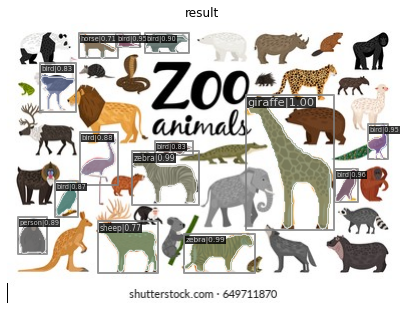

In [ ]:
# Let's plot the result, bounding boxes with score more then "score_thr" are shown only
show_result_pyplot(model, img, result, score_thr=0.7, palette=(127, 127, 127))

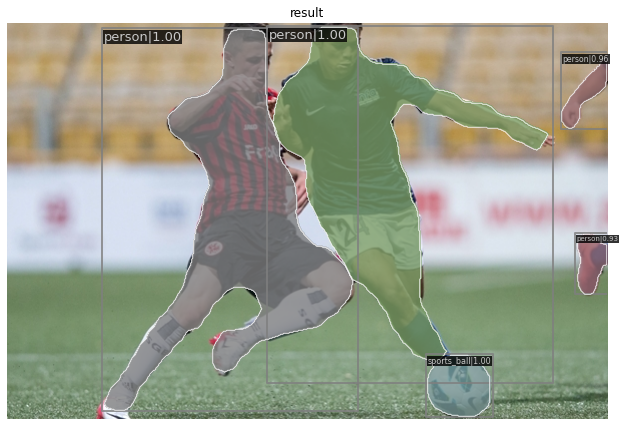

In [ ]:
# Let's plot the result, bounding boxes with score more then "score_thr" are shown only
show_result_pyplot(model, img, result, score_thr=0.7, palette=(127, 127, 127))

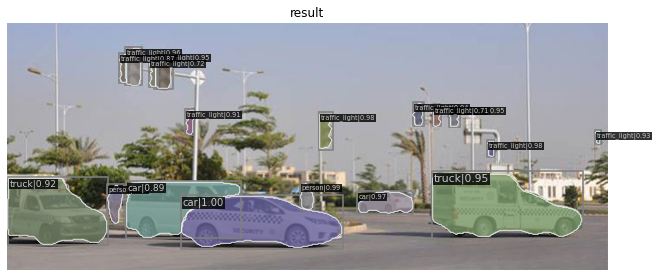

In [ ]:
# Let's plot the result, bounding boxes with score more then "score_thr" are shown only
show_result_pyplot(model, img, result, score_thr=0.7, palette=(127, 127, 127))

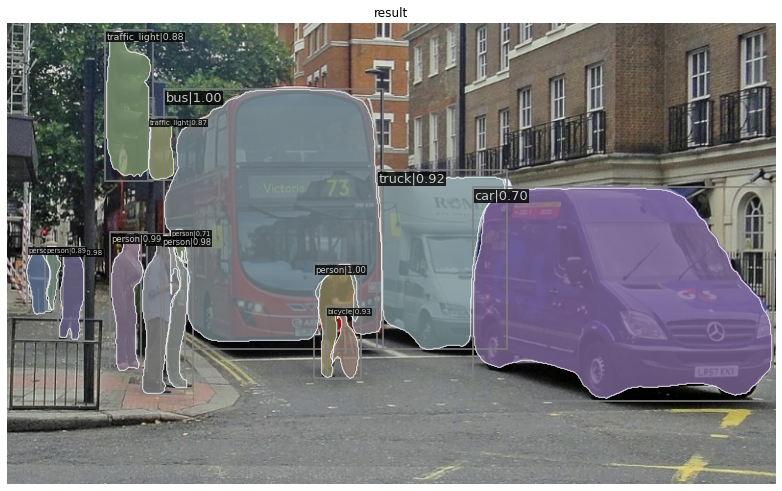

In [ ]:
# Let's plot the result, bounding boxes with score more then "score_thr" are shown only
show_result_pyplot(model, img, result, score_thr=0.7, palette=(127, 127, 127))

In [ ]:
# Let's plot the result, bounding boxes with score more then "score_thr" are shown only
show_result_pyplot(model, img, result, score_thr=0.9, palette=(127, 127, 127))

IndexError: ignored

ValueError: ignored

<Figure size 600.01x247.01 with 1 Axes>

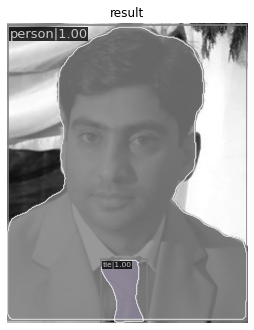

In [ ]:
# Let's plot the result, bounding boxes with score more then "score_thr" are shown only
show_result_pyplot(model, img, result, score_thr=0.5, palette=(127, 127, 127))

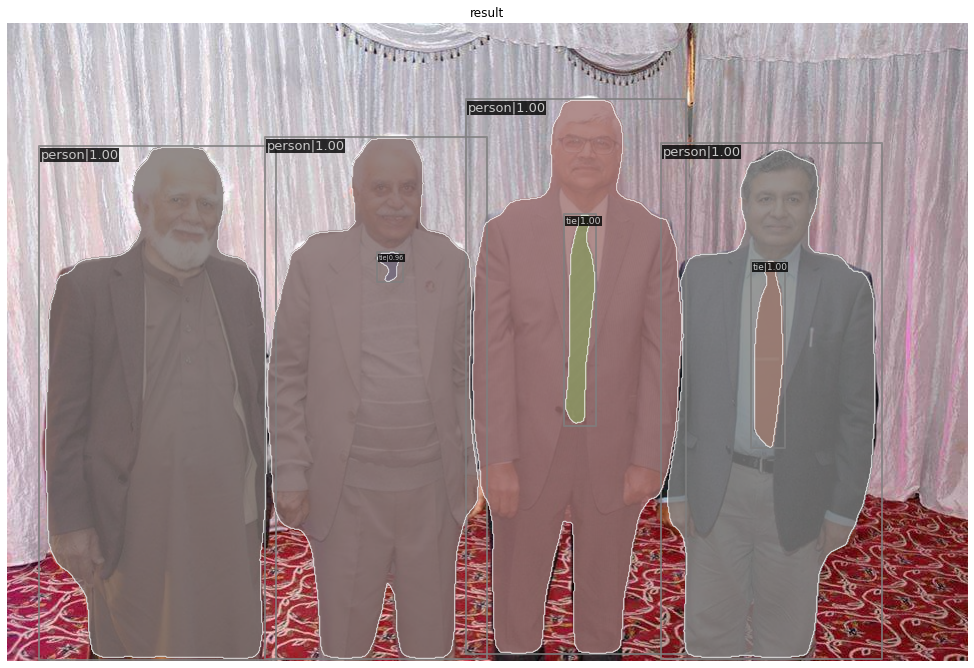

In [ ]:
# Let's plot the result, bounding boxes with score more then "score_thr" are shown only
show_result_pyplot(model, img, result, score_thr=0.5, palette=(127, 127, 127))

In [ ]:
# show all the 80 classes along with index in the COCO dataset
for idx, class_name in enumerate(checkpoint['meta']['CLASSES']):
    print(idx, class_name)

0 person
1 bicycle
2 car
3 motorcycle
4 airplane
5 bus
6 train
7 truck
8 boat
9 traffic_light
10 fire_hydrant
11 stop_sign
12 parking_meter
13 bench
14 bird
15 cat
16 dog
17 horse
18 sheep
19 cow
20 elephant
21 bear
22 zebra
23 giraffe
24 backpack
25 umbrella
26 handbag
27 tie
28 suitcase
29 frisbee
30 skis
31 snowboard
32 sports_ball
33 kite
34 baseball_bat
35 baseball_glove
36 skateboard
37 surfboard
38 tennis_racket
39 bottle
40 wine_glass
41 cup
42 fork
43 knife
44 spoon
45 bowl
46 banana
47 apple
48 sandwich
49 orange
50 broccoli
51 carrot
52 hot_dog
53 pizza
54 donut
55 cake
56 chair
57 couch
58 potted_plant
59 bed
60 dining_table
61 toilet
62 tv
63 laptop
64 mouse
65 remote
66 keyboard
67 cell_phone
68 microwave
69 oven
70 toaster
71 sink
72 refrigerator
73 book
74 clock
75 vase
76 scissors
77 teddy_bear
78 hair_drier
79 toothbrush


Define function for downloading video from youtube using URL

In [ ]:
from pytube import YouTube
import os

def downloadYouTube(videourl, path):
    yt = YouTube(videourl)
    yt = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
    if not os.path.exists(path):
        os.makedirs(path)
    yt.download(path)


Download Youtube Video

In [ ]:
# YOUTUBE_VIDEO_LINK = 'https://www.youtube.com/watch?v=aBLrQWZ6zTE&list=PLcQZGj9lFR7y5WikozDSrdk6UCtAnM9mB&index=14'
# set youtube video link here
YOUTUBE_VIDEO_LINK = 'https://www.youtube.com/watch?v=wyCW2LdzOas&list=PLcQZGj9lFR7y5WikozDSrdk6UCtAnM9mB&index=6'
# folder where youtube video will be saved
FOLDER_PATH = '/content'
downloadYouTube(YOUTUBE_VIDEO_LINK, FOLDER_PATH)

RegexMatchError: ignored

In [ ]:
import cv2
# write path of video to run
VIDEO_FILE_PATH = '/content/9MP 360-degree camera, Quad PTZ _ Interchange in Thailand.mp4'
cap = cv2.VideoCapture(VIDEO_FILE_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frames:', total_frames)
print('resolution:', cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Total Frames: 685
resolution: 960.0 720.0


In [ ]:
import cv2

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# IMPORTANT POINT: match the dimension (last argument) of output file with input file (cap variable)
out = cv2.VideoWriter('/content/output.avi', fourcc, 20.0, (960, 720))

# write path of video to run
VIDEO_FILE_PATH = '/content/9MP 360-degree camera, Quad PTZ _ Interchange in Thailand.mp4'
cap = cv2.VideoCapture(VIDEO_FILE_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frames:', total_frames)

# check if video is loaded properly
if cap.isOpened():
    start = 0
    end = 400
    frame_count = 0
    # loop until "frame_count" is less than "end"
    while frame_count <= end:
        # Capture frame-by-frame
        ret, frame = cap.read()
        # print(frame.shape)
        frame_count += 1

        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # ignore this iteration if "frame_count" is less than "start"
        if frame_count < start:
            continue

        print('[frame_count]', frame_count)
        # Use the detector to do inference on this frame
        result = inference_detector(model, frame)

        # plot results on this frame and save that image in output variable
        output = model.show_result(frame,
                                result,
                                score_thr=0.5,
                                show=False,
                                wait_time=0,
                                win_name='',
                                bbox_color=None,
                                text_color=(200, 200, 200),
                                mask_color=None)
        
        # write the output frame
        out.write(output)

# When everything done, release the capture and output files
cap.release()
out.release()
print('[done]')

Total Frames: 685
[frame_count] 1
[frame_count] 2
[frame_count] 3
[frame_count] 4
[frame_count] 5
[frame_count] 6
[frame_count] 7
[frame_count] 8
[frame_count] 9
[frame_count] 10
[frame_count] 11
[frame_count] 12
[frame_count] 13
[frame_count] 14
[frame_count] 15
[frame_count] 16
[frame_count] 17
[frame_count] 18
[frame_count] 19
[frame_count] 20
[frame_count] 21
[frame_count] 22
[frame_count] 23
[frame_count] 24
[frame_count] 25
[frame_count] 26
[frame_count] 27
[frame_count] 28
[frame_count] 29
[frame_count] 30
[frame_count] 31
[frame_count] 32
[frame_count] 33
[frame_count] 34
[frame_count] 35
[frame_count] 36
[frame_count] 37
[frame_count] 38
[frame_count] 39
[frame_count] 40
[frame_count] 41
[frame_count] 42
[frame_count] 43
[frame_count] 44
[frame_count] 45
[frame_count] 46
[frame_count] 47
[frame_count] 48
[frame_count] 49
[frame_count] 50
[frame_count] 51
[frame_count] 52
[frame_count] 53
[frame_count] 54
[frame_count] 55
[frame_count] 56
[frame_count] 57
[frame_count] 58
[fram

---

# Draw Model Output on Image

In [ ]:
import numpy as np

def draw_annotations_from_result(image, result, class_names, score_thr=0.3, overlay_factor=0.5, draw_bboxes=True, draw_masks=True, stroke_weight=1):
    """
    image => original image
    result => output of model
    class_names => class names of coco dataset
    score_thr => draw predictions with score more then score_thr
    overlay_factor => transparency of mask image, should be between 0 and 1
    draw_bboxes => if true than bounding boxes are drawn else not drawn
    draw_masks => if true than mask images are drawn else not drawn
    stroke_weight => line width of bounding boxes
    """
    np.random.seed(0)
    # make copy of input image to draw things onto it.
    image_output = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2BGR)
    # font size of text on image
    font_size = 0.4
    # font weight of text on image
    font_weight = 1

    # this loop iterates over all 80 class of coco dataset
    # label will have values 0, 1, 2, ..., 79
    for label in range(80):
        # get actual class name for that coco label
        class_name = class_names[label]
        # filter only those predictions that are above score_thr
        idx = np.where(result[0][label][:, 4] > score_thr)
        
        # only drawning code only if length of idx array is more then 0
        if len(idx[0]) != 0:
            # get bounding boxes and masks array from result array for label class
            bboxes, masks = np.array(result[0][label]), np.array(result[1][label])
            bboxes, masks = bboxes[idx], masks[idx]
            # array to store colors of bounding boxes and masks
            colors = []

            # draw bounding boxes
            if draw_bboxes:
                for bbox in bboxes:
                    # Person|0.93
                    text = f"{class_name}|{bbox[4]:.2f}"
                    # generate 3 random numbers between 100 and 200 corresponding to (r, g, b) values
                    bg_color = tuple(np.random.randint(100, 200, 3).tolist())
                    colors.append(bg_color)
                    # get coordinates of bbox
                    x1 = int(bbox[0])
                    y1 = int(bbox[1])
                    x2 = int(bbox[2])
                    y2 = int(bbox[3])
                    # draw bounding box
                    # cv2.rectangle(image, top_left, bottom_right, color, line_thickness, smooth)
                    cv2.rectangle(image_output, (x1, y1), (x2, y2), bg_color, 2, cv2.LINE_AA)
                    # in order to draw text within output, recalculate coordinates
                    x2 = x1 + 75
                    y2 = y1 - 25
                    if x2 >= image_output.shape[1]:
                        x2 = int(bbox[2])
                        x1 = x2 - 75
                    if y2 <= 0:
                        y2 = int(bbox[3])
                        y1 = y2 + 25
                    # draw black rectangle for text background
                    cv2.rectangle(image_output, (x1, y1), (x2, y2), (0, 0, 0), -1)
                    # draw text
                    cv2.putText(image_output, text, (x1 + 5, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, font_size, (255, 255, 255), font_weight, cv2.LINE_AA)

            # draw masks
            if draw_masks:
                for index, image_mask in enumerate(masks):
                    # create empyty image of same size as input image
                    overlay = np.ones(image.shape, dtype=np.uint8)
                    # bg_color = tuple(np.random.randint(50, 255, 3).tolist())
                    bg_color = colors[index]
                    # fill colors in empty image corresponding to rectangle color
                    overlay[:, :, 0] *= bg_color[0]
                    overlay[:, :, 1] *= bg_color[1]
                    overlay[:, :, 2] *= bg_color[2]
                    # image_output_mask > 0 represents mask regions, get index for those pixels
                    mask_indices = np.where(image_mask > 0)
                    # add original image with mask image such that pixels corresponding to mask_indices are added
                    image_output[mask_indices] = cv2.addWeighted(image_output[mask_indices], 1 - overlay_factor, overlay[mask_indices], overlay_factor, 0)
    
    # convert image from BGR colors to RGB colors
    image_output = cv2.cvtColor(image_output, cv2.COLOR_BGR2RGB)

    return image_output


In [ ]:
from google.colab.patches import cv2_imshow
# Use the detector to do inference on demo image
# img = 'demo/demo.jpg'
img = 'sample1.jpeg'
result = inference_detector(model, img)
# output = draw_outputs_on_image(img, result, model.CLASSES)
img_original = cv2.imread(img)
image_output = draw_annotations_from_result(img_original, result, model.CLASSES, score_thr=0.5, overlay_factor=0.5, stroke_weight=1)
cv2_imshow(image_output)

NameError: ignored

Define function for downloading video from youtube using URL

In [ ]:
from pytube import YouTube
import os

def downloadYouTube(videourl, path):
    yt = YouTube(videourl)
    yt = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
    if not os.path.exists(path):
        os.makedirs(path)
    yt.download(path)


import cv2
# write path of video to run
VIDEO_FILE_PATH = '/content/traffic.mp4'
cap = cv2.VideoCapture(VIDEO_FILE_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frames:', total_frames)
print('resolution:', cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))import cv2
# write path of video to run
VIDEO_FILE_PATH = '/content/traffic.mp4'
cap = cv2.VideoCapture(VIDEO_FILE_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frames:', total_frames)
print('resolution:', cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))/content/mixkit-busy-street-in-the-city-4000.mp4/content/mixkit-busy-street-in-the-city-4000.mp4/content/mixkit-busy-street-in-the-city-4000.mp4/content/mixkit-busy-street-in-the-city-4000.mp4/content/mixkit-busy-street-in-the-city-4000.mp4/content/mixkit-busy-street-in-the-city-4000.mp4Download Youtube Video

In [ ]:
# YOUTUBE_VIDEO_LINK = 'https://www.youtube.com/watch?v=aBLrQWZ6zTE&list=PLcQZGj9lFR7y5WikozDSrdk6UCtAnM9mB&index=14'
# set youtube video link here
YOUTUBE_VIDEO_LINK = 'https://www.youtube.com/watch?v=wyCW2LdzOas&list=PLcQZGj9lFR7y5WikozDSrdk6UCtAnM9mB&index=6'
# folder where youtube video will be saved
FOLDER_PATH = '/content'
downloadYouTube(YOUTUBE_VIDEO_LINK, FOLDER_PATH)

In [ ]:
# importing the module
from pytube import YouTube

# where to save
SAVE_PATH = "/content" #to_do

# link of the video to be downloaded
link = "https://www.youtube.com/watch?v=PJ5xXXcfuTc"

try:
	# object creation using YouTube
	# which was imported in the beginning
	yt = YouTube(link)
except:
	print("Connection Error") #to handle exception

# filters out all the files with "mp4" extension
mp4files = yt.filter('mp4')

#to set the name of the file
yt.set_filename('abc')

# get the video with the extension and
# resolution passed in the get() function
d_video = yt.get(mp4files[-1].extension,mp4files[-1].resolution)
try:
	# downloading the video
	d_video.download(SAVE_PATH)
except:
	print("Some Error!")
print('Task Completed!')


In [ ]:
import cv2
# write path of video to run
VIDEO_FILE_PATH = '/content/traffic.mp4'
cap = cv2.VideoCapture(VIDEO_FILE_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frames:', total_frames)
print('resolution:', cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Total Frames: 685
resolution: 480.0 360.0


In [ ]:
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# IMPORTANT POINT: match the dimension (last argument) of output file with input file (cap variable)
out = cv2.VideoWriter('/content/output.avi', fourcc, 20.0, (480, 360))

# write path of video to run
VIDEO_FILE_PATH = '/content/traffic.mp4'
cap = cv2.VideoCapture(VIDEO_FILE_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print('Total Frames:', total_frames)

# check if video is loaded properly
if cap.isOpened():
    start = 0
    end = 100
    frame_count = 0
    # loop until "frame_count" is less than "end"
    while frame_count <= end:
        # Capture frame-by-frame
        ret, frame = cap.read()
        # print(frame.shape)
        frame_count += 1

        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # ignore this iteration if "frame_count" is less than "start"
        if frame_count < start:
            continue

        print('[frame_count]', frame_count)
        # Use the detector to do inference on this frame
        result = inference_detector(model, frame)

        # plot results on this frame and save that image in output variable
        output = draw_annotations_from_result(frame, result, model.CLASSES, score_thr=0.5, overlay_factor=0.5, stroke_weight=1)
        
        # write the output frame
        out.write(output)

# When everything done, release the capture and output files
cap.release()
out.release()
print('[done]')

[frame_count] 1
[frame_count] 2
[frame_count] 3
[frame_count] 4
[frame_count] 5
[frame_count] 6
[frame_count] 7
[frame_count] 8
[frame_count] 9
[frame_count] 10
[frame_count] 11
[frame_count] 12
[frame_count] 13
[frame_count] 14
[frame_count] 15
[frame_count] 16
[frame_count] 17
[frame_count] 18
[frame_count] 19
[frame_count] 20
[frame_count] 21
[frame_count] 22
[frame_count] 23
[frame_count] 24
[frame_count] 25
[frame_count] 26
[frame_count] 27
[frame_count] 28
[frame_count] 29
[frame_count] 30
[frame_count] 31
[frame_count] 32
[frame_count] 33
[frame_count] 34
[frame_count] 35
[frame_count] 36
[frame_count] 37
[frame_count] 38
[frame_count] 39
[frame_count] 40
[frame_count] 41
[frame_count] 42
[frame_count] 43
[frame_count] 44
[frame_count] 45
[frame_count] 46
[frame_count] 47
[frame_count] 48
[frame_count] 49
[frame_count] 50
[frame_count] 51
[frame_count] 52
[frame_count] 53
[frame_count] 54
[frame_count] 55
[frame_count] 56
[frame_count] 57
[frame_count] 58
[frame_count] 59
[frame

---